Scraping code to IMF IFS DB 
Nazareno Cruz Dominguez Romero

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Data base generator / no-cleaning base
the csv link is IMF open data and describe the set of variables

In [ ]:
#implement Anually data is useful to code the time in a most little and compact DB, we must change the time code
dfk = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DB/IFS.csv', delimiter=',')

url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/IFS/A.AR.'
start_date=".?startPeriod=2000"


#change A.AR (END-LINK) code anually, for "A" must change to "M" and "Q"
#AR is the country code
#also u can change the start period.

dft = {'A': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
           2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 
           2018, 2019, 2020]}
dft = pd.DataFrame(dft, columns = ['time'])



#not available variables
NAdf=[]
#available variables
Adf=[]

j=0
i=0
for key in dfk["Code"]:
    
    try:
        data=requests.get(f'{url}{key}{start_date}').json()
        df=pd.DataFrame(data['CompactData']['DataSet']['Series']['Obs'])
        df.columns=["time_f",f"{key}"]
        df["time_f"]=pd.to_datetime(df["time_f"])
        
        df["time"]=1
        m=0

        for t in df["time_f"]:
            year=t
            a=year.year
            df.at[m,"time"]=a
            m=m+1
        
        df=df.drop(['time_f'], axis=1)

        df[f"{key}"]=df[f"{key}"].astype('float')

        #dft[f"{key}"]=df[f"{key}"]
        #dft["time"]=df["time"]

        dft=pd.merge(dft,df, on = "time", how="outer")

        Adf.append (f"{key}")
        j=j+1
    except:
        NAdf.append (f"{key}")
        i=i+1
#the data output is the set "dft"

#dft["ENEE_XDC_EUR_RATE"]

In [ ]:
dft.tail(20)

,FDSBR_PT,time,NYDI_XDC,AIPMA_IX,AIPMA_PC_CP_A_PT,AIPMA_PC_PP_PT,ENEE_XDC_EUR_RATE,ENEA_XDC_EUR_RATE,ENSE_XDC_XDR_RATE,ENSA_XDC_XDR_RATE,ENDE_XDC_USD_RATE,ENDA_XDC_USD_RATE,ESNE_XDR_XDC_RATE,ESNA_XDR_XDC_RATE,EDNE_USD_XDC_RATE,EDNA_USD_XDC_RATE,NXS_XDC,NX_XDC,NX_SA_XDC,NMG_XDC,NMS_XDC,NM_XDC,NM_SA_XDC,TMG_CIF_PC_CP_A_PT,TMG_CIF_PC_PP_PT,TMG_CIF_USD,NCPHI_XDC,NCP_XDC,NCP_SA_XDC,NCGG_XDC,FICD_PA,FIDR_FX_PA,FIDR_PA,FILR_PA,FIMM_FX_PA,FISR_PA,HPHC_XDR,HPHC_USD,HLTF_XDR,HLTF_USD,...,52BX__XDC,52D___XDC,52B___XDC,52____XDC,51N___XDC,55L___XDC,FASMB_PC_CP_A_PT,16D___XDC,12A___XDC,12F___XDC,16C___XDC,17R___XDC,14A___XDC,10RA__XDC,37A___XDC,32BX__XDC,32F___XDC,32D___XDC,32B___XDC,32____XDC,31N___XDC,35L___XDC,37R___XDC,42A___XDC,42E___XDC,42BX__XDC,42D___XDC,42B___XDC,46G___XDC,41____XDC,46C___XDC,47R___XDC,40____XDC,NYCT_XDC,NGDPNPI_XDC,LP_PE_NUM,NSG_XDC,NSDGDP_XDC,LU_PE_PC_CP_A_PT,LU_PE_PC_PP_PT
1,24.366322,2001,2.613945e+05,NaN,NaN,NaN,0.880859,0.895182,1.256101,1.272402,0.9995,0.999500,0.796114,0.785915,1.000500,1.000500,4812.851409,3.135505e+04,NaN,1.915780e+04,8372.762169,2.753056e+04,NaN,-19.627388,-19.627388,20319.0,7.406570e+05,2.056067e+05,NaN,4.132850e+04,NaN,NaN,NaN,NaN,NaN,NaN,13238.234072,16636.883099,0.0,0.0,...,445.198,55979.138,9212.195,1.000717e+05,-8406.358654,73056.422,17.851418,4366.454,2.049521e+04,0.000,14381.779916,2177.147346,9081.228,2.790297e+04,18957.528000,442.754,0.000,54158.605,9212.069,9.823107e+04,-8178.428654,72922.287,-1.827173e+03,17.534,64.225,2.444,1820.533,0.126,0.000,35.138,263.068,876.072,89.289,424.494817,-7726.740702,37275.644,38192.751717,1.220703e-09,24.467558,24.467558
2,34.555721,2002,2.917696e+05,NaN,NaN,NaN,3.481684,2.896535,4.513617,3.966423,3.3200,3.063257,0.221552,0.252116,0.301205,0.326450,9037.098326,8.874948e+04,NaN,2.633191e+04,15150.106262,4.148202e+04,NaN,-55.750775,-55.750775,8991.0,7.739280e+05,2.144134e+05,NaN,4.139839e+04,NaN,NaN,NaN,NaN,NaN,NaN,12664.564761,17217.769459,0.0,0.0,...,259.460,47924.323,11471.681,1.951158e+05,-45181.313379,87345.102,69.768166,66.819,5.723103e+04,80.608,49741.560727,28590.181621,16429.503,7.052948e+04,30589.501000,259.156,80.608,47248.573,11465.683,1.935734e+05,-45077.838379,87294.434,3.061159e+04,941.026,63.192,0.304,675.750,5.998,80.608,49.085,152.560,399.037,141.428,1751.124716,-22561.633296,37681.743,60042.605996,-7.324219e-10,-0.159172,-0.159172
3,44.322979,2003,3.543394e+05,NaN,NaN,NaN,3.669015,3.281077,4.316743,4.062549,2.9050,2.900629,0.231656,0.246151,0.344234,0.344753,9973.990510,9.826553e+04,NaN,3.873442e+04,16257.122739,5.499154e+04,NaN,54.054054,54.054054,13851.0,9.502660e+05,2.634682e+05,NaN,4.656188e+04,NaN,NaN,NaN,NaN,NaN,NaN,12563.212368,18668.559349,0.0,0.0,...,617.600,40458.034,2620.114,1.903148e+05,-23859.909396,113209.964,66.276458,259.027,6.258426e+04,91.052,47040.520190,16881.421604,26648.674,8.503891e+04,25568.143000,617.226,91.052,39926.032,2619.884,1.891962e+05,-23869.597396,113164.011,2.659449e+04,676.989,68.714,0.374,532.002,0.230,91.052,60.959,51.271,169.947,169.176,1511.061943,-23081.015533,38087.866,73776.107576,3.051758e-10,-12.196762,-12.196762
4,44.046551,2004,4.233144e+05,NaN,NaN,NaN,4.030454,3.636301,4.595348,4.329336,2.9590,2.923301,0.217611,0.230982,0.337952,0.342079,13987.190049,1.156884e+05,1.156884e+05,6.268610e+04,19031.685127,8.171778e+04,8.171778e+04,62.060501,62.060501,22447.0,1.248328e+06,3.120819e+05,3.120819e+05,5.391879e+04,NaN,NaN,NaN,NaN,NaN,NaN,11190.011245,17378.168515,0.0,0.0,...,591.039,46971.367,1902.240,2.032386e+05,1881.424404,137536.351,20.670007,161.262,6.553790e+04,115.889,43385.337864,17370.382319,33871.552,1.086172e+05,28781.445085,590.755,115.889,46092.177,1902.143,2.019498e+05,1939.015404,137412.015,3.769538e+04,525.076,128.457,0.284,879.190,0.097,115.889,24.552,82.143,401.440,79.081,1757.925046,-26086.939918,38491.970,92299.901726,0.000000e+00,-34.311020,-34.311020
5,36.685845,2005,5.156913e+05,74.543636,NaN,NaN,3.553256,3.612412,4.304948,4.288598,3.0120,2.903658,0.232291,0.233176

In [ ]:
print(len(dft.columns))

138


In [ ]:
#export the dataframe to your drive folder
dft.to_csv('data.csv')
!cp data.csv "drive/My Drive/Colab Notebooks/DB/"

In [ ]:
#interpolation for missing values
df_intpol=dft.interpolate()

for var in Adf:
    df_intpol[f"{var}"]=df_intpol[f"{var}"].astype(np.float32)
df_intpol["time"]=df_intpol["time"].astype(np.float32)

print(type(df_intpol["EDNE_USD_XDC_RATE"][3]))
print(type(df_intpol["time"][3]))

#np.nan_to_num(df_intpol)

#columns clean DB


df_intpol=df_intpol.dropna(1)
df_intpol.isnull().values.any()
#np.where(np.isnan(df_intpol))

df_intpol.tail(20)

<class 'numpy.float32'>
<class 'numpy.float32'>


,FDSBR_PT,time,NYDI_XDC,ENEE_XDC_EUR_RATE,ENEA_XDC_EUR_RATE,ENSE_XDC_XDR_RATE,ENSA_XDC_XDR_RATE,ENDE_XDC_USD_RATE,ENDA_XDC_USD_RATE,ESNE_XDR_XDC_RATE,ESNA_XDR_XDC_RATE,EDNE_USD_XDC_RATE,EDNA_USD_XDC_RATE,NXS_XDC,NX_XDC,NMG_XDC,NMS_XDC,NM_XDC,TMG_CIF_PC_CP_A_PT,TMG_CIF_PC_PP_PT,TMG_CIF_USD,NCPHI_XDC,NCP_XDC,NCGG_XDC,HPHC_XDR,HPHC_USD,HLTF_XDR,HLTF_USD,HNCA_XDR,HNCA_USD,HPG_XDR,HPG_USD,HPL_XDR,HPL_USD,HSA_XDR,HSA_USD,HPUPQ_PA,HPU_XDR,HPU_USD,HPURTP_XDR,...,52BX__XDC,52D___XDC,52B___XDC,52____XDC,51N___XDC,55L___XDC,FASMB_PC_CP_A_PT,16D___XDC,12A___XDC,12F___XDC,16C___XDC,17R___XDC,14A___XDC,10RA__XDC,37A___XDC,32BX__XDC,32F___XDC,32D___XDC,32B___XDC,32____XDC,31N___XDC,35L___XDC,37R___XDC,42A___XDC,42E___XDC,42BX__XDC,42D___XDC,42B___XDC,46G___XDC,41____XDC,46C___XDC,47R___XDC,40____XDC,NYCT_XDC,NGDPNPI_XDC,LP_PE_NUM,NSG_XDC,NSDGDP_XDC,LU_PE_PC_CP_A_PT,LU_PE_PC_PP_PT
1,24.366322,2001.0,2.613945e+05,0.880859,0.895182,1.256101,1.272402,0.999500,0.999500,0.796114,0.785915,1.000500,1.000500,4812.851562,3.135505e+04,1.915780e+04,8372.761719,2.753056e+04,-19.627388,-19.627388,20319.0,7.406570e+05,2.056067e+05,4.132850e+04,13238.234375,16636.882812,0.0,0.0,0.0,0.0,11121.105469,13976.224609,0.0,0.0,318.369995,400.105072,525.299011,11121.105469,13976.224609,0.000000,...,445.197998,5.597914e+04,9212.195312,1.000717e+05,-8406.358398,7.305642e+04,17.851418,4366.454102,2.049521e+04,0.000000,14381.780273,2177.147461,9081.227539,2.790297e+04,18957.527344,442.753998,0.000000,5.415861e+04,9212.069336,9.823107e+04,-8178.428711,7.292229e+04,-1.827173e+03,17.534000,64.224998,2.444,1820.532959,0.126,0.000000,35.138000,263.067993,876.072021,89.289001,424.494812,-7726.740723,37275.644531,38192.750000,1.220703e-09,24.467558,24.467558
2,34.555721,2002.0,2.917696e+05,3.481684,2.896535,4.513617,3.966423,3.320000,3.063257,0.221552,0.252116,0.301205,0.326450,9037.098633,8.874948e+04,2.633191e+04,15150.106445,4.148202e+04,-55.750774,-55.750774,8991.0,7.739280e+05,2.144134e+05,4.139839e+04,12664.564453,17217.769531,0.0,0.0,0.0,0.0,10547.476562,14339.539062,0.0,0.0,318.369995,432.831390,498.203979,10547.476562,14339.539062,0.024863,...,259.459991,4.792432e+04,11471.680664,1.951158e+05,-45181.312500,8.734510e+04,69.768166,66.819000,5.723103e+04,80.608002,49741.562500,28590.181641,16429.503906,7.052948e+04,30589.501953,259.156006,80.608002,4.724857e+04,11465.682617,1.935734e+05,-45077.839844,8.729444e+04,3.061159e+04,941.026001,63.192001,0.304,675.750000,5.998,80.608002,49.084999,152.559998,399.036987,141.427994,1751.124756,-22561.632812,37681.742188,60042.605469,-7.324219e-10,-0.159172,-0.159172
3,44.322979,2003.0,3.543394e+05,3.669015,3.281077,4.316743,4.062549,2.905000,2.900629,0.231656,0.246151,0.344234,0.344753,9973.990234,9.826553e+04,3.873442e+04,16257.123047,5.499154e+04,54.054054,54.054054,13851.0,9.502660e+05,2.634682e+05,4.656188e+04,12563.211914,18668.558594,0.0,0.0,0.0,0.0,10446.164062,15522.689453,0.0,0.0,318.369995,473.088348,493.418579,10446.164062,15522.689453,0.063992,...,617.599976,4.045804e+04,2620.114014,1.903148e+05,-23859.910156,1.132100e+05,66.276459,259.027008,6.258426e+04,91.052002,47040.519531,16881.421875,26648.673828,8.503891e+04,25568.142578,617.226013,91.052002,3.992603e+04,2619.884033,1.891962e+05,-23869.597656,1.131640e+05,2.659449e+04,676.989014,68.713997,0.374,532.002014,0.230,91.052002,60.959000,51.271000,169.947006,169.175995,1511.061890,-23081.015625,38087.867188,73776.109375,3.051758e-10,-12.196762,-12.196762
4,44.046551,2004.0,4.233144e+05,4.030454,3.636301,4.595348,4.329336,2.959000,2.923301,0.217611,0.230982,0.337952,0.342079,13987.190430,1.156884e+05,6.268610e+04,19031.685547,8.171778e+04,62.060501,62.060501,22447.0,1.248328e+06,3.120819e+05,5.391879e+04,11190.011719,17378.167969,0.0,0.0,0.0,0.0,9073.048828,14090.510742,0.0,0.0,318.369995,494.430908,428.560242,9073.048828,14090.510742,0.155031,...,591.039001,4.697137e+04,1902.239990,2.032386e+05,1881.424438,1.375363e+05,20.670008,161.261993,6.553790e+04,115.889000,43385

In [ ]:
df_intpol.tail(20)

,FDSBR_PT,time,NYDI_XDC,ENEE_XDC_EUR_RATE,ENEA_XDC_EUR_RATE,ENSE_XDC_XDR_RATE,ENSA_XDC_XDR_RATE,ENDE_XDC_USD_RATE,ENDA_XDC_USD_RATE,ESNE_XDR_XDC_RATE,ESNA_XDR_XDC_RATE,EDNE_USD_XDC_RATE,EDNA_USD_XDC_RATE,NXS_XDC,NX_XDC,NMG_XDC,NMS_XDC,NM_XDC,TMG_CIF_PC_CP_A_PT,TMG_CIF_PC_PP_PT,TMG_CIF_USD,NCPHI_XDC,NCP_XDC,NCGG_XDC,HPHC_XDR,HPHC_USD,HLTF_XDR,HLTF_USD,HNCA_XDR,HNCA_USD,HPG_XDR,HPG_USD,HPL_XDR,HPL_USD,HSA_XDR,HSA_USD,HPUPQ_PA,HPU_XDR,HPU_USD,HPURTP_XDR,...,52BX__XDC,52D___XDC,52B___XDC,52____XDC,51N___XDC,55L___XDC,FASMB_PC_CP_A_PT,16D___XDC,12A___XDC,12F___XDC,16C___XDC,17R___XDC,14A___XDC,10RA__XDC,37A___XDC,32BX__XDC,32F___XDC,32D___XDC,32B___XDC,32____XDC,31N___XDC,35L___XDC,37R___XDC,42A___XDC,42E___XDC,42BX__XDC,42D___XDC,42B___XDC,46G___XDC,41____XDC,46C___XDC,47R___XDC,40____XDC,NYCT_XDC,NGDPNPI_XDC,LP_PE_NUM,NSG_XDC,NSDGDP_XDC,LU_PE_PC_CP_A_PT,LU_PE_PC_PP_PT
1,24.366322,2001.0,2.613945e+05,0.880859,0.895182,1.256101,1.272402,0.999500,0.999500,0.796114,0.785915,1.000500,1.000500,4812.851562,3.135505e+04,1.915780e+04,8372.761719,2.753056e+04,-19.627388,-19.627388,20319.0,7.406570e+05,2.056067e+05,4.132850e+04,13238.234375,16636.882812,0.0,0.0,0.0,0.0,11121.105469,13976.224609,0.0,0.0,318.369995,400.105072,525.299011,11121.105469,13976.224609,0.000000,...,445.197998,5.597914e+04,9212.195312,1.000717e+05,-8406.358398,7.305642e+04,17.851418,4366.454102,2.049521e+04,0.000000,14381.780273,2177.147461,9081.227539,2.790297e+04,18957.527344,442.753998,0.000000,5.415861e+04,9212.069336,9.823107e+04,-8178.428711,7.292229e+04,-1.827173e+03,17.534000,64.224998,2.444,1820.532959,0.126,0.000000,35.138000,263.067993,876.072021,89.289001,424.494812,-7726.740723,37275.644531,38192.750000,1.220703e-09,24.467558,24.467558
2,34.555721,2002.0,2.917696e+05,3.481684,2.896535,4.513617,3.966423,3.320000,3.063257,0.221552,0.252116,0.301205,0.326450,9037.098633,8.874948e+04,2.633191e+04,15150.106445,4.148202e+04,-55.750774,-55.750774,8991.0,7.739280e+05,2.144134e+05,4.139839e+04,12664.564453,17217.769531,0.0,0.0,0.0,0.0,10547.476562,14339.539062,0.0,0.0,318.369995,432.831390,498.203979,10547.476562,14339.539062,0.024863,...,259.459991,4.792432e+04,11471.680664,1.951158e+05,-45181.312500,8.734510e+04,69.768166,66.819000,5.723103e+04,80.608002,49741.562500,28590.181641,16429.503906,7.052948e+04,30589.501953,259.156006,80.608002,4.724857e+04,11465.682617,1.935734e+05,-45077.839844,8.729444e+04,3.061159e+04,941.026001,63.192001,0.304,675.750000,5.998,80.608002,49.084999,152.559998,399.036987,141.427994,1751.124756,-22561.632812,37681.742188,60042.605469,-7.324219e-10,-0.159172,-0.159172
3,44.322979,2003.0,3.543394e+05,3.669015,3.281077,4.316743,4.062549,2.905000,2.900629,0.231656,0.246151,0.344234,0.344753,9973.990234,9.826553e+04,3.873442e+04,16257.123047,5.499154e+04,54.054054,54.054054,13851.0,9.502660e+05,2.634682e+05,4.656188e+04,12563.211914,18668.558594,0.0,0.0,0.0,0.0,10446.164062,15522.689453,0.0,0.0,318.369995,473.088348,493.418579,10446.164062,15522.689453,0.063992,...,617.599976,4.045804e+04,2620.114014,1.903148e+05,-23859.910156,1.132100e+05,66.276459,259.027008,6.258426e+04,91.052002,47040.519531,16881.421875,26648.673828,8.503891e+04,25568.142578,617.226013,91.052002,3.992603e+04,2619.884033,1.891962e+05,-23869.597656,1.131640e+05,2.659449e+04,676.989014,68.713997,0.374,532.002014,0.230,91.052002,60.959000,51.271000,169.947006,169.175995,1511.061890,-23081.015625,38087.867188,73776.109375,3.051758e-10,-12.196762,-12.196762
4,44.046551,2004.0,4.233144e+05,4.030454,3.636301,4.595348,4.329336,2.959000,2.923301,0.217611,0.230982,0.337952,0.342079,13987.190430,1.156884e+05,6.268610e+04,19031.685547,8.171778e+04,62.060501,62.060501,22447.0,1.248328e+06,3.120819e+05,5.391879e+04,11190.011719,17378.167969,0.0,0.0,0.0,0.0,9073.048828,14090.510742,0.0,0.0,318.369995,494.430908,428.560242,9073.048828,14090.510742,0.155031,...,591.039001,4.697137e+04,1902.239990,2.032386e+05,1881.424438,1.375363e+05,20.670008,161.261993,6.553790e+04,115.889000,43385

In [ ]:
#Random Forest model to exchange rate USD ARG
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


y=df_intpol["EDNE_USD_XDC_RATE"]
resq=df_intpol.drop(["EDNE_USD_XDC_RATE"], axis=1)
X=resq
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,test_size = 0.05,shuffle = False)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)

prdt=rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(prdt,val_y)


print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))




Validation MAE for Random Forest Model: 0.044288135208189486


[0.06101334 0.06101334]
19    0.016725
20    0.016725
Name: EDNE_USD_XDC_RATE, dtype: float32


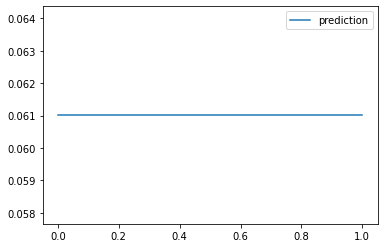

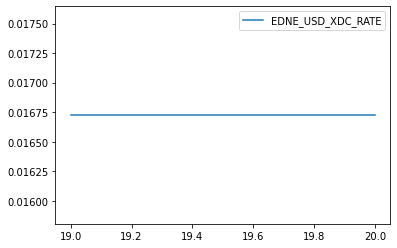

In [ ]:
print(prdt)
print(val_y)
#prdt.plot()

prediction=pd.DataFrame(prdt,columns=["prediction"])
ex_rate=pd.DataFrame(val_y)

prediction.plot()
ex_rate.plot()

In [ ]:
print(1/0.071)
print(1/0.016)

14.084507042253522
62.5
